/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kme

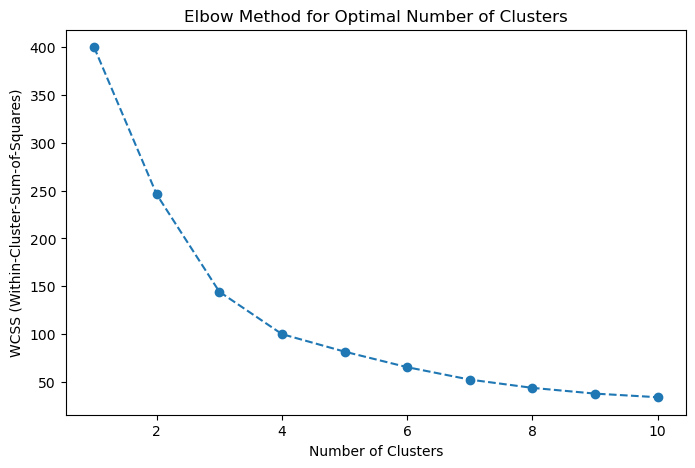

/opt/conda/envs/anaconda-ai-2024.04-py310/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


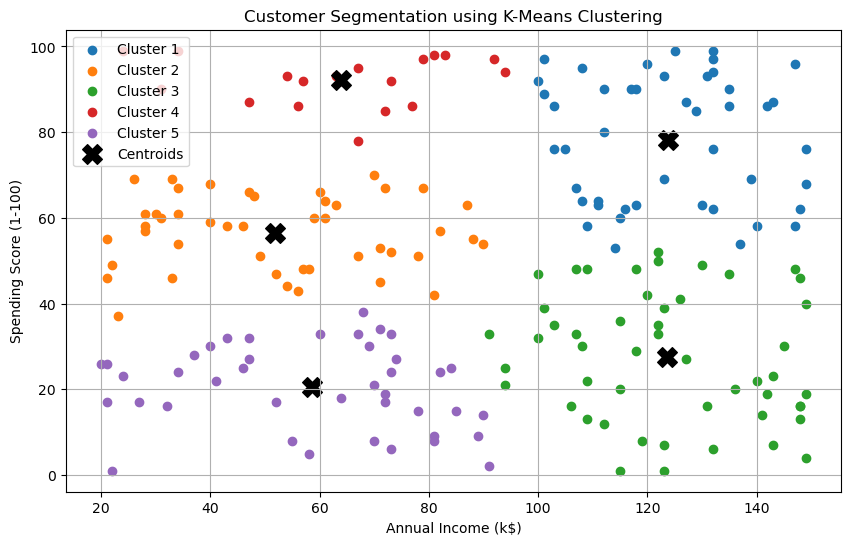

Customer Clustering Insights:

Cluster 1:
- Number of Customers: 45
- Average Annual Income: $123.73k
- Average Spending Score: 78.18

Cluster 2:
- Number of Customers: 45
- Average Annual Income: $51.76k
- Average Spending Score: 56.56

Cluster 3:
- Number of Customers: 50
- Average Annual Income: $123.68k
- Average Spending Score: 27.56

Cluster 4:
- Number of Customers: 19
- Average Annual Income: $63.95k
- Average Spending Score: 92.16

Cluster 5:
- Number of Customers: 41
- Average Annual Income: $58.63k
- Average Spending Score: 20.44


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Generate synthetic customer purchasing data
np.random.seed(42)
num_customers = 200

# Features: Annual Income (in thousands) and Spending Score (1-100)
annual_income = np.random.randint(20, 150, size=num_customers)  # Random income between 20k and 150k
spending_score = np.random.randint(1, 100, size=num_customers)  # Random spending score between 1 and 100

# Create a DataFrame
data = pd.DataFrame({
    'Annual Income (k$)': annual_income,
    'Spending Score (1-100)': spending_score
})


# Standardize the data (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares)')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (e.g., 5)
optimal_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster assignments to the dataframe
data['Cluster'] = clusters  # Add this line to create the Cluster column

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(
        data[data['Cluster'] == cluster]['Annual Income (k$)'],
        data[data['Cluster'] == cluster]['Spending Score (1-100)'],
        label=f'Cluster {cluster + 1}'
    )

# Plot cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

# Print cluster insights
print("Customer Clustering Insights:")
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster + 1}:")
    print(f"- Number of Customers: {len(cluster_data)}")
    print(f"- Average Annual Income: ${cluster_data['Annual Income (k$)'].mean():.2f}k")
    print(f"- Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.2f}")